# **Environment Setup**

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix

# **Data Preparation**

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Loading Data

In [0]:
df = pd.read_csv('/content/gdrive/My Drive/ColabNotebooks/R6_Bank_NN/bank.csv')

In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* No missing data in the data set.

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Cleaning Data

* RowNumber, CustomerId and Surname could be dropped as they won't be of much use

In [0]:
df.drop(labels=['RowNumber','CustomerId','Surname'], axis=1,inplace=True)

EDA

In [9]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

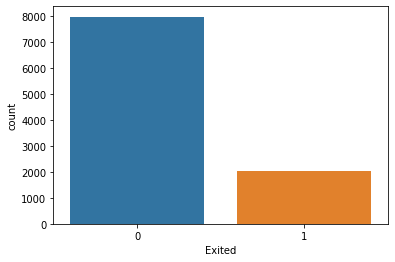

In [10]:
sns.countplot(df.Exited)

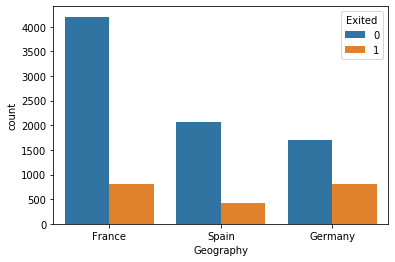

In [11]:
sns.countplot(x=df.Geography, data=df, hue='Exited')

Maximum and frequent exit happens in Germany

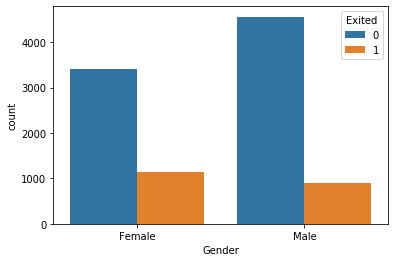

In [12]:
sns.countplot(x=df.Gender, data=df, hue='Exited')

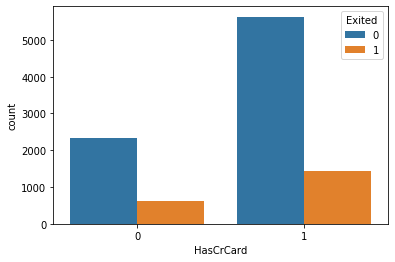

In [13]:
sns.countplot(x=df.HasCrCard, data=df, hue='Exited')

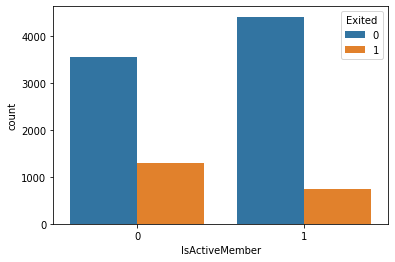

In [14]:
sns.countplot(x=df.IsActiveMember, data=df, hue='Exited')

In [15]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [17]:
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
print(categorical_columns)
numerical_columns = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
numerical_columns.remove('Exited')
print(numerical_columns)

['Geography', 'Gender']
['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


In [18]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


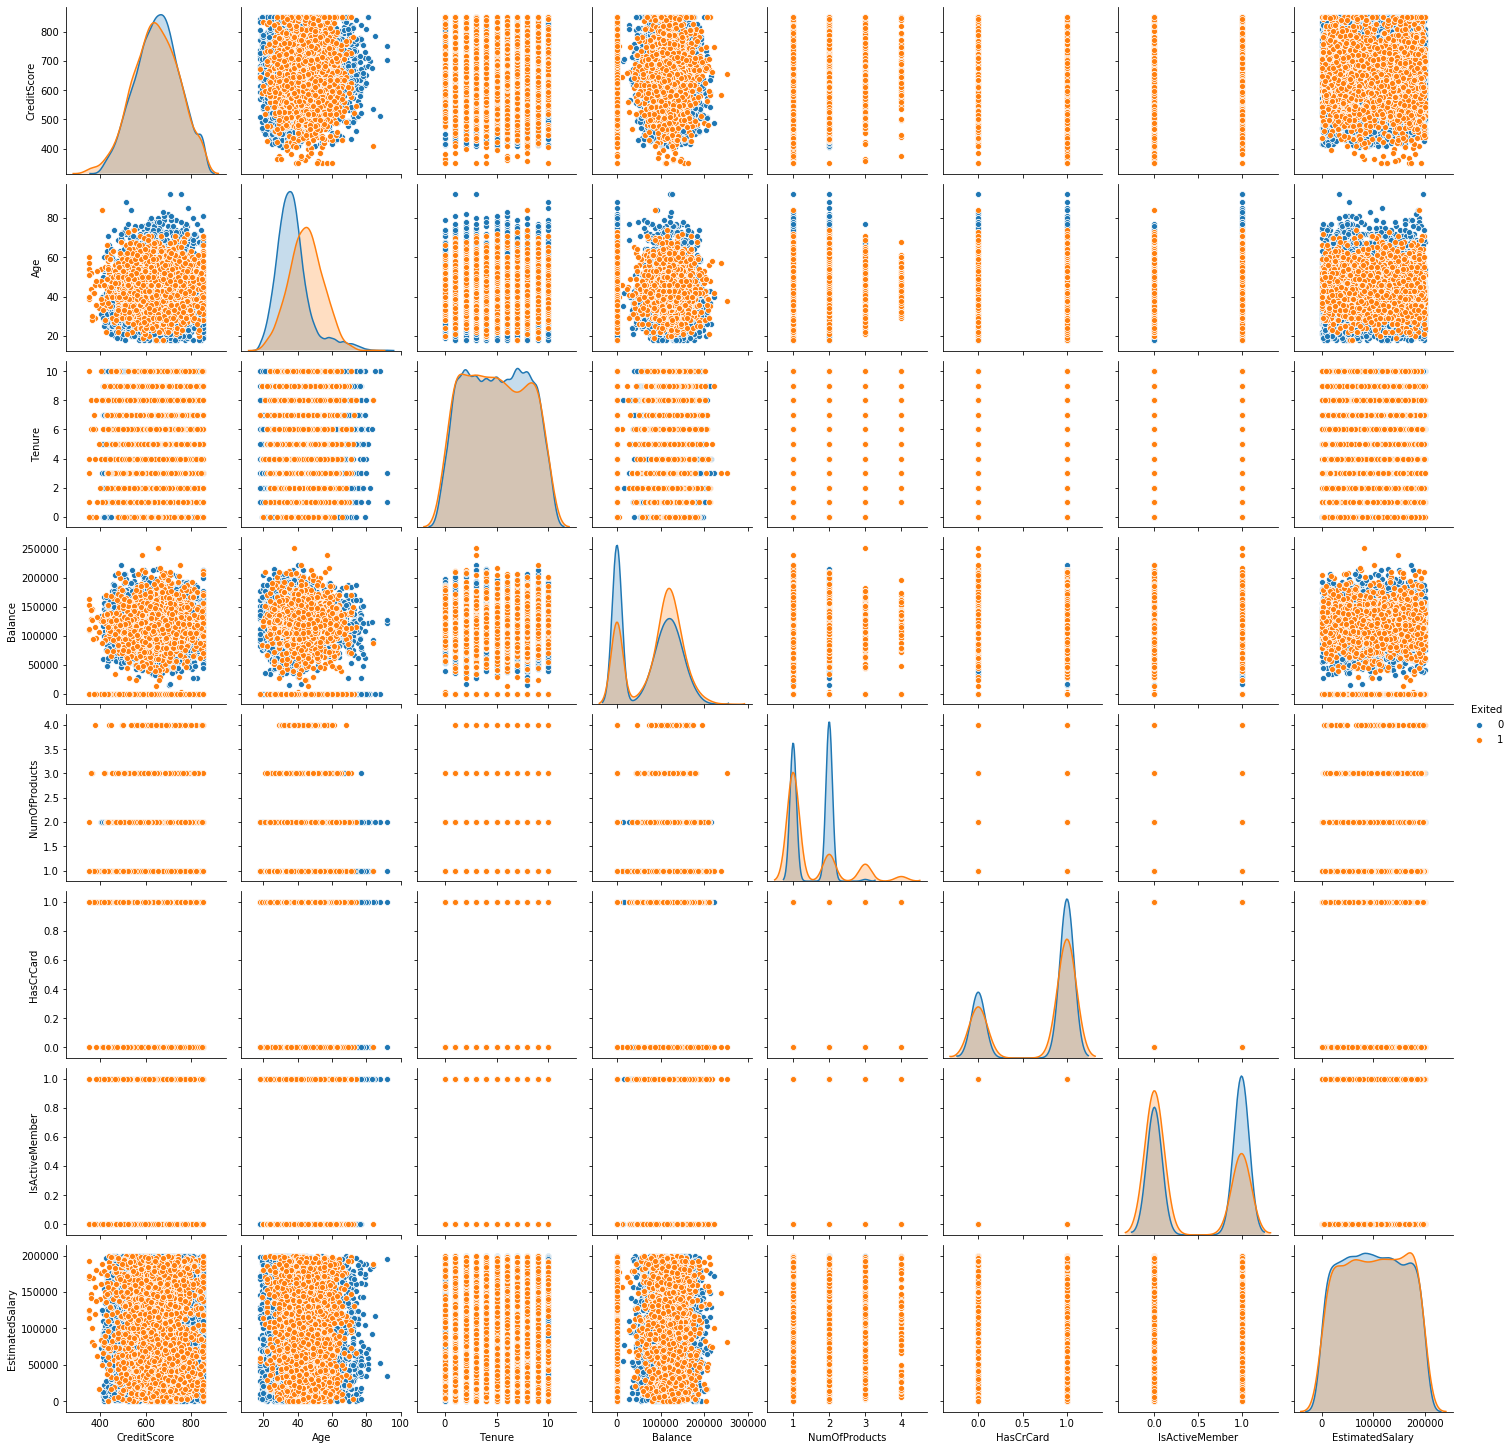

In [19]:
sns.pairplot(df, hue='Exited')

Transformation and Train Test Split

In [0]:
preprocessor = ColumnTransformer([("numerical", "passthrough", numerical_columns), 
                                  ("categorical", OneHotEncoder(sparse=False, handle_unknown="ignore"),categorical_columns)])

In [0]:
eda_pipeline = Pipeline([("preprocessor", preprocessor),
                        ("Normalizer", StandardScaler())])

In [0]:
X = df.drop(labels=['Exited'], axis=1)
y = df.Exited

In [0]:
X = eda_pipeline.fit_transform(X)

In [24]:
X[0:5]

array([[-0.32622142,  0.29351742, -1.04175968, -1.22584767, -0.91158349,
         0.64609167,  0.97024255,  0.02188649,  0.99720391, -0.57873591,
        -0.57380915,  1.09598752, -1.09598752],
       [-0.44003595,  0.19816383, -1.38753759,  0.11735002, -0.91158349,
        -1.54776799,  0.97024255,  0.21653375, -1.00280393, -0.57873591,
         1.74273971,  1.09598752, -1.09598752],
       [-1.53679418,  0.29351742,  1.03290776,  1.33305335,  2.52705662,
         0.64609167, -1.03067011,  0.2406869 ,  0.99720391, -0.57873591,
        -0.57380915,  1.09598752, -1.09598752],
       [ 0.50152063,  0.00745665, -1.38753759, -1.22584767,  0.80773656,
        -1.54776799, -1.03067011, -0.10891792,  0.99720391, -0.57873591,
        -0.57380915,  1.09598752, -1.09598752],
       [ 2.06388377,  0.38887101, -1.04175968,  0.7857279 , -0.91158349,
         0.64609167,  0.97024255, -0.36527578, -1.00280393, -0.57873591,
         1.74273971,  1.09598752, -1.09598752]])

In [25]:
X.shape

(10000, 13)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Model Creation

In [27]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [28]:
import tensorflow as tf
print(tf.__version__)

2.1.0


# Model(ADAM)

In [0]:
from tensorflow import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout

In [0]:
model = Sequential()
model.add(Dense(6, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(rate=0.01))
model.add(Dense(6, activation='relu'))
model.add(Dropout(rate=0.01))
model.add(Dense(1, activation='sigmoid'))

In [75]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 6)                 84        
_________________________________________________________________
dropout_34 (Dropout)         (None, 6)                 0         
_________________________________________________________________
dense_52 (Dense)             (None, 6)                 42        
_________________________________________________________________
dropout_35 (Dropout)         (None, 6)                 0         
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 7         
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Model Training

In [77]:
history = model.fit(X_train, y_train,epochs=200, verbose=1,validation_split=0.2)

Train on 6000 samples, validate on 1500 samples
Epoch 1/200
6000/6000 [==============================] - 1s 149us/sample - loss: 0.5633 - accuracy: 0.7892 - val_loss: 0.4890 - val_accuracy: 0.8000
Epoch 2/200
6000/6000 [==============================] - 0s 66us/sample - loss: 0.4875 - accuracy: 0.7972 - val_loss: 0.4525 - val_accuracy: 0.8080
Epoch 3/200
6000/6000 [==============================] - 0s 69us/sample - loss: 0.4585 - accuracy: 0.8067 - val_loss: 0.4363 - val_accuracy: 0.8120
Epoch 4/200
6000/6000 [==============================] - 0s 66us/sample - loss: 0.4441 - accuracy: 0.8130 - val_loss: 0.4278 - val_accuracy: 0.8147
Epoch 5/200
6000/6000 [==============================] - 0s 67us/sample - loss: 0.4332 - accuracy: 0.8193 - val_loss: 0.4231 - val_accuracy: 0.8220
Epoch 6/200
6000/6000 [==============================] - 0s 68us/sample - loss: 0.4294 - accuracy: 0.8170 - val_loss: 0.4190 - val_accuracy: 0.8260
Epoch 7/200
6000/6000 [==============================] - 0s 66u

# Model Evaluation

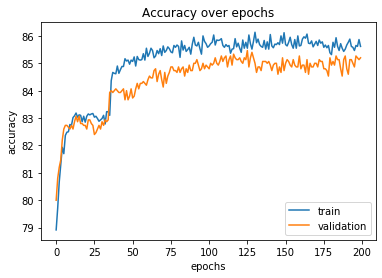

In [78]:
plt.plot(np.array(history.history['accuracy']) * 100)
plt.plot(np.array(history.history['val_accuracy']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Accuracy over epochs')
plt.show()

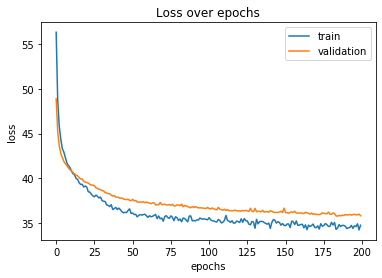

In [79]:
plt.plot(np.array(history.history['loss']) * 100)
plt.plot(np.array(history.history['val_loss']) * 100)
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Loss over epochs')
plt.show()

In [0]:
y_pred = model.predict(X_test)

In [81]:
print(y_pred[0:5])

[[0.12248228]
 [0.03902806]
 [0.11377527]
 [0.21244355]
 [0.0444014 ]]


In [0]:
y_pred = (y_pred > 0.5).astype(int)

In [83]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[1926   77]
 [ 250  247]]


In [84]:
print (((conf_matrix[0][0]+conf_matrix[1][1])*100)/(len(y_test)), '% of testing data was classified correctly')

86.92 % of testing data was classified correctly
